My data is saved in TensorBoard during training, and I also write programs to plot and compare the data

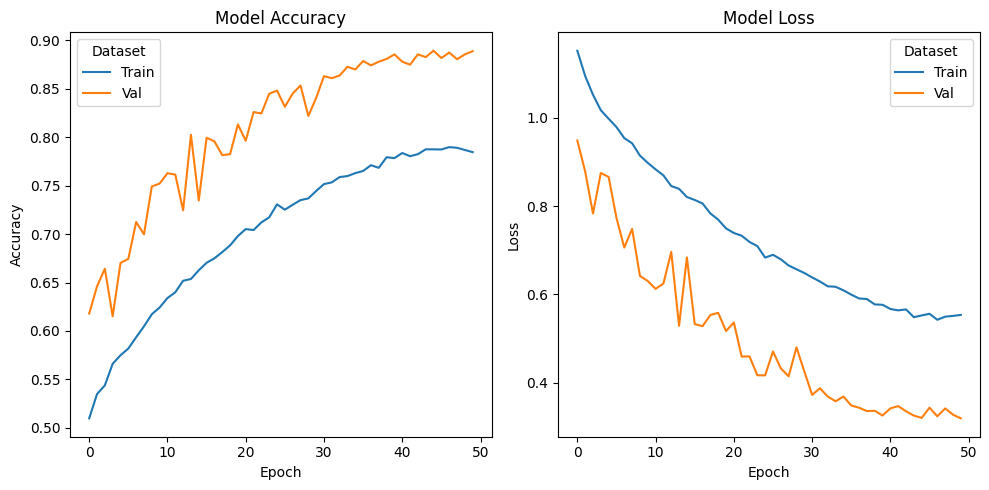

In [15]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def get_data(logdir, tag):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()

    data = event_acc.Scalars(tag)

    steps = [d.step for d in data]
    values = [d.value for d in data]

    return steps, values

cnn_logdir = './runs/logs/mobilenet_v2'

train_steps_acc, train_acc = get_data(cnn_logdir, 'train_acc')
val_steps_acc, val_acc = get_data(cnn_logdir, 'val_acc')
train_steps_loss, train_loss = get_data(cnn_logdir, 'train_loss')
val_steps_loss, val_loss = get_data(cnn_logdir, 'val_loss')

# Create a DataFrame for accuracy
df_acc = pd.DataFrame({
    'Epoch': train_steps_acc + val_steps_acc,
    'Accuracy': train_acc + val_acc,
    'Dataset': ['Train'] * len(train_steps_acc) + ['Val'] * len(val_steps_acc),
})

# Create a DataFrame for loss
df_loss = pd.DataFrame({
    'Epoch': train_steps_loss + val_steps_loss,
    'Loss': train_loss + val_loss,
    'Dataset': ['Train'] * len(train_steps_loss) + ['Val'] * len(val_steps_loss),
})

# Create line plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_acc, x='Epoch', y='Accuracy', hue='Dataset').set_title('Model Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_loss, x='Epoch', y='Loss', hue='Dataset').set_title('Model Loss')

plt.tight_layout()
plt.show()


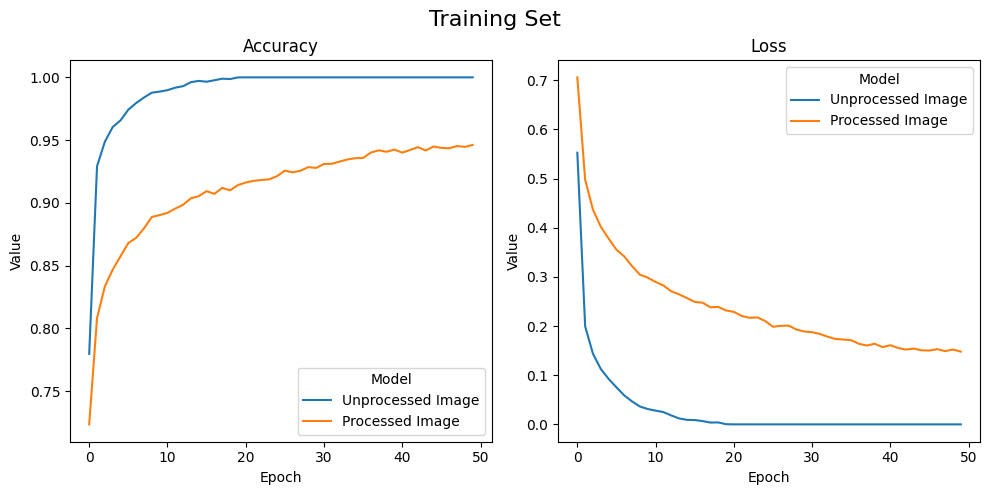

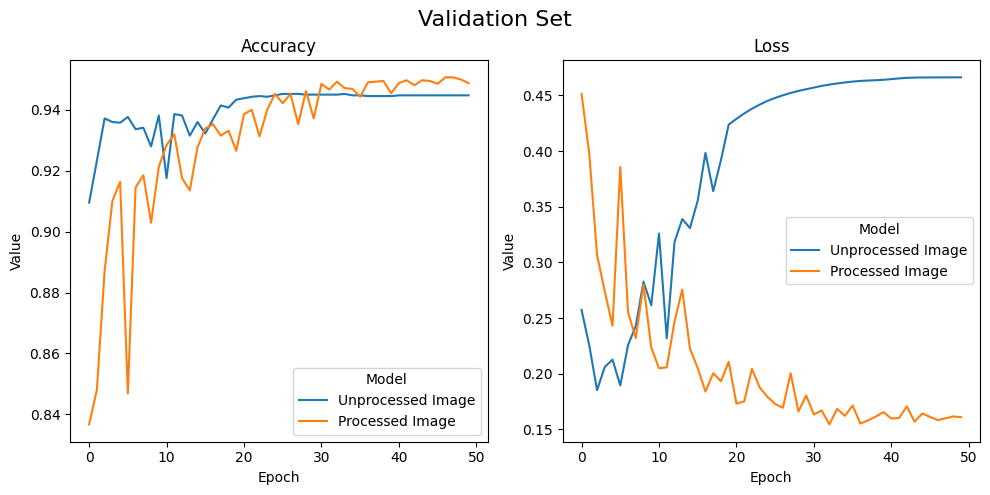

In [8]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
import pandas as pd

def get_data(logdir, tag):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()  # Load the log file

    # Fetch 'tag' data
    data = event_acc.Scalars(tag)

    # Extract the data and steps (usually epochs)
    steps = [d.step for d in data]
    values = [d.value for d in data]

    return steps, values

unprocessed_image_logdir = './runs/logs/Unprocessed image'
processed_image_logdir = './runs/logs/myself'

logdirs = [unprocessed_image_logdir, processed_image_logdir]
models = ['Unprocessed Image', 'Processed Image']
tags = ['train_acc', 'train_loss', 'val_acc', 'val_loss']

dfs = []
for tag in tags:
    for model, logdir in zip(models, logdirs):
        steps, values = get_data(logdir, tag)
        df = pd.DataFrame({
            'Epoch': steps,
            'Value': values,
            'Model': [model] * len(steps),
            'Metric': [tag.split('_')[1]] * len(steps),  # Split tag into phase and metric
            'Phase': [tag.split('_')[0]] * len(steps)
        })
        dfs.append(df)

df = pd.concat(dfs)

# Create line plots for training set
plt.figure(figsize=(10, 5))
plt.suptitle('Training Set', fontsize=16)

plt.subplot(1, 2, 1)
sns.lineplot(data=df[(df["Metric"]=="acc") & (df["Phase"]=="train")], x='Epoch', y='Value', hue='Model').set_title('Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=df[(df["Metric"]=="loss") & (df["Phase"]=="train")], x='Epoch', y='Value', hue='Model').set_title('Loss')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Create line plots for validation set
plt.figure(figsize=(10, 5))
plt.suptitle('Validation Set', fontsize=16)

plt.subplot(1, 2, 1)
sns.lineplot(data=df[(df["Metric"]=="acc") & (df["Phase"]=="val")], x='Epoch', y='Value', hue='Model').set_title('Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=df[(df["Metric"]=="loss") & (df["Phase"]=="val")], x='Epoch', y='Value', hue='Model').set_title('Loss')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


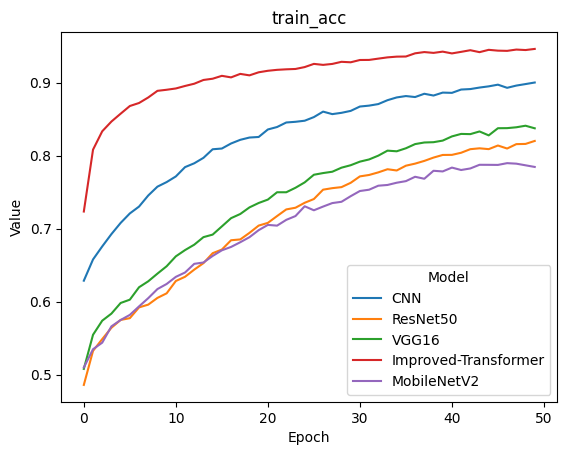

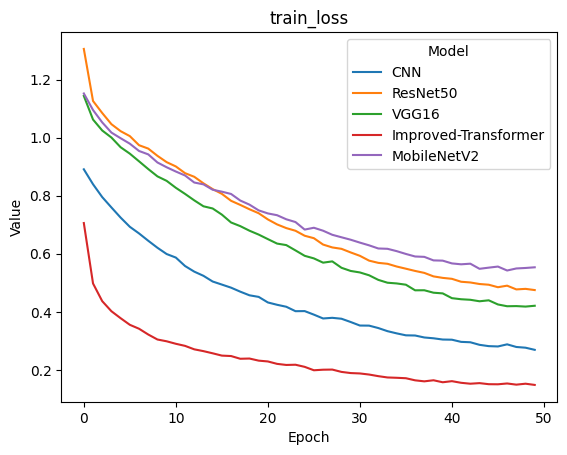

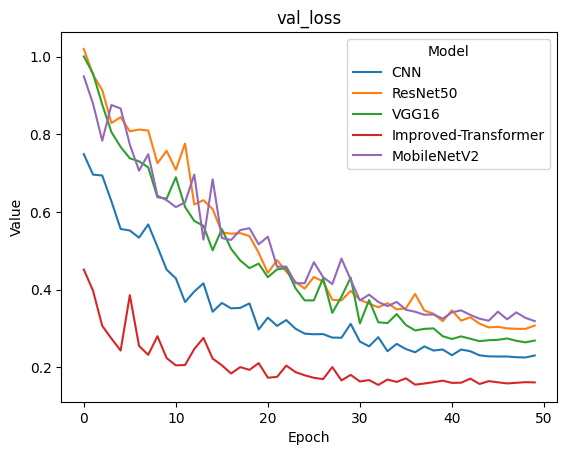

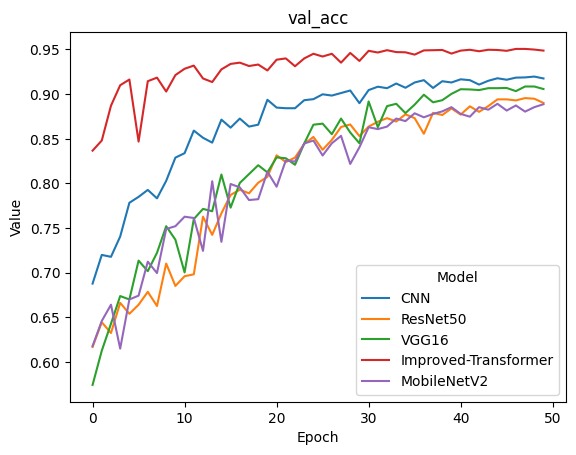

In [3]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
import pandas as pd

def get_data(logdir, tag):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()  # Load the log file

    # Fetch 'tag' data
    data = event_acc.Scalars(tag)

    # Extract the data and steps (usually epochs)
    steps = [d.step for d in data]
    values = [d.value for d in data]

    return steps, values

cnn_logdir = './runs/logs/cnn'
resnet50_logdir = './runs/logs/resnet50'
vgg16_logdir = './runs/logs/vgg16'
myself_logdir = './runs/logs/myself'
mobilenet_v2_logdir = './runs/logs/mobilenet_v2'

logdirs = [cnn_logdir, resnet50_logdir,vgg16_logdir,myself_logdir, mobilenet_v2_logdir]
models = ['CNN', 'ResNet50', 'VGG16', 'Improved-Transformer', 'MobileNetV2']
tags = ['train_acc', 'train_loss', 'val_loss', 'val_acc']

for tag in tags:
    dfs = []
    for model, logdir in zip(models, logdirs):
        steps, values = get_data(logdir, tag)
        df = pd.DataFrame({
            'Epoch': steps,
            'Value': values,
            'Model': [model] * len(steps)
        })
        dfs.append(df)

    df = pd.concat(dfs)
    sns.lineplot(data=df, x='Epoch', y='Value', hue='Model').set_title(tag)
    plt.show()
